In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Annoying

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

## Exploratory data analysis
For this dataset I have decided on a few things that I want to look at in order to find proper dishes for the restaurant. For the menu I want the food to be easily digestable for me, except for a few dishes, just because some of the things I can't digest are still delicious, like dal. I want the menu to be smaller than normal, like 15 dishes or less, maybe half being meat, a couple snacks, desserts and the rest being vegetarian dishes.
1. Cook time and prep time. The length of time it takes to make a dish is important, the faster the better, but you can't always choose speed in cooking, sometimes you have to take your time.
2. Different dishes in different courses. It makes sense to have a variety of availabilities, main dishes, side dishes, smaller/starter foods, and some desserts and drinks.
3. Commonly used ingredients.
4. Meat dishes. I am a big meat eater, and I have trouble digesting several types of plants as well. I think if I were to have a restaurant, I would like to be able to eat what is on the menu.

In [49]:
df = pd.read_csv('../data/processed_indian_food.csv')
df.sample(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
56,basundi,"sugar, milk, nuts",vegetarian,10,35,sweet,dessert,gujarat,west
150,paruppu sadam,"arhar dal, sambar powder, tomato, curry leaves...",vegetarian,10,20,neutral/other,main course,tamil nadu,south
249,shukto,"green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,west bengal,east
124,attu,"whole wheat flour, arhar dal, ginger, kala jee...",vegetarian,150,25,spicy,snack,andhra pradesh,south
194,laapsi,"cinnamon, jaggery, clarified butter, dry roasted",vegetarian,10,40,spicy,main course,madhya pradesh,central
166,zunka,"gram flour, mustard, garlic, turmeric, red chilli",vegetarian,10,25,spicy,main course,maharashtra,west
167,kolim jawla,"baingan, fish, coconut oil, fresh coconut, ginger",non vegetarian,15,25,spicy,main course,maharashtra,west
50,pootharekulu,"rice flour, powdered sugar, ghee",vegetarian,10,60,sweet,dessert,andhra pradesh,south
174,chevdo,"citric acid, fry, raisins, sugar, chana daal",vegetarian,20,30,spicy,snack,gujarat,west
173,chakali,"rice flour, sesame, plain flour, turmeric, red...",vegetarian,10,40,spicy,snack,maharashtra,west


Creating a new column to display the total time it takes to cook a dish. While the separate times are useful, especially with certain items taking a much longer time in prep (marinating) than in cooking.

In [8]:
df['total_time'] = df['prep_time'] + df['cook_time']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,total_time
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,70
1,boondi,"gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,110
2,gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,75
3,ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,45
4,gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,55


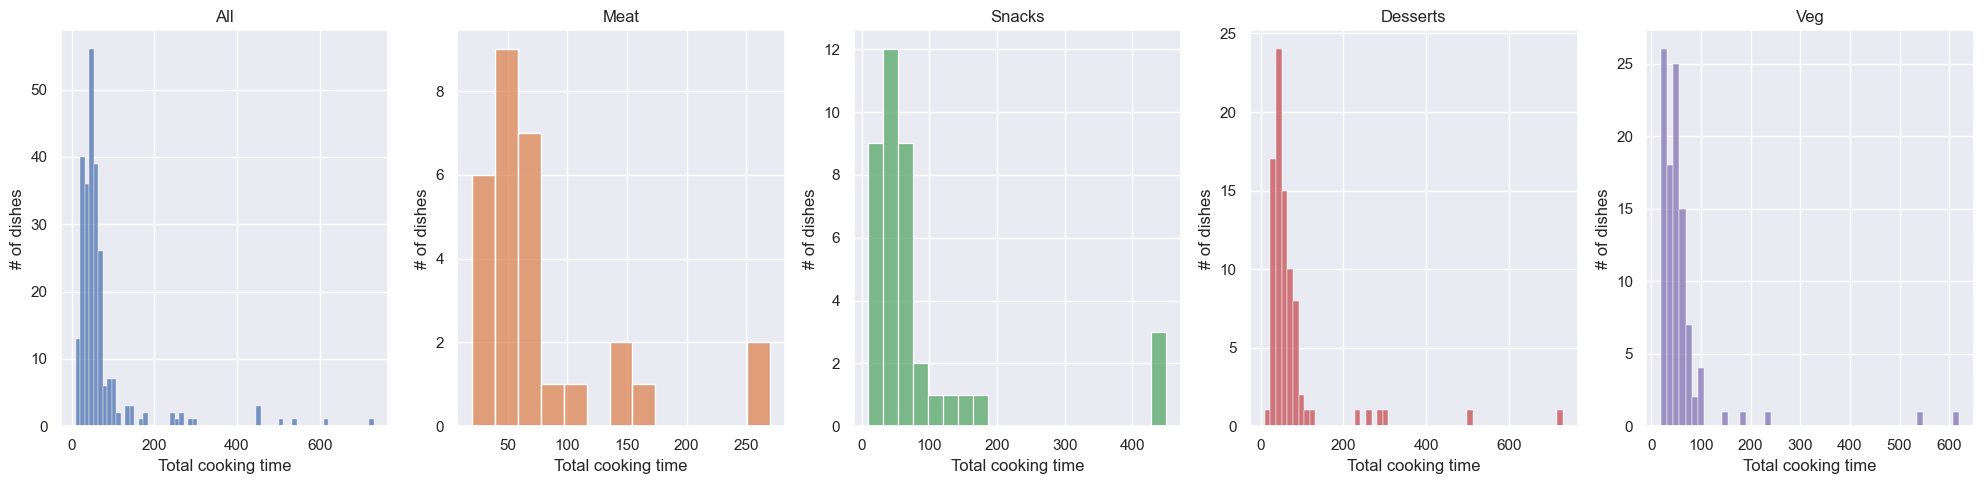

In [9]:
fig, ax = plt.subplots(1, 5, figsize = (20, 5))
data_ = [
    df,
    df[df['diet'] == 'non vegetarian'],
    df[df['course'] == 'snack'],
    df[df['course'] == 'dessert'],
    df[(df['course'] == 'main course') & (df['diet'] == 'vegetarian')]
]
names = ['All', 'Meat', 'Snacks', 'Desserts', 'Veg']
colors = sns.color_palette('deep', 5)
for i in range(0, 5):      
    sns.histplot(data = data_[i], x = 'total_time', ax = ax[i], color = colors[i])
    ax[i].set_ylabel('# of dishes')
    ax[i].set_xlabel('Total cooking time')
    ax[i].set_title(names[i])
plt.tight_layout()
fig.savefig('../figures/food_time.png')

In [10]:
sorted_by_time = df.sort_values(by = 'total_time', ascending = True, inplace = False)

fast_desserts = sorted_by_time[sorted_by_time['course'] == 'dessert'].head(25).reset_index(drop = True)
fast_meat = sorted_by_time[sorted_by_time['diet'] == 'non vegetarian'].head(25).reset_index(drop = True)
fast_veg = sorted_by_time[(sorted_by_time['diet'] == 'vegetarian') & (sorted_by_time['course'] == 'main course')].head(25).reset_index(drop = True)
fast_snacks = sorted_by_time[sorted_by_time['course'] == 'snack'].head(25).reset_index(drop = True)
fastest_foods = pd.DataFrame({
    'fast_desserts': fast_desserts['name'],
    'fast_meat': fast_meat['name'],
    'fast_veg': fast_veg['name'],
    'fast_snacks': fast_snacks['name']
})
fastest_foods

,fast_desserts,fast_meat,fast_veg,fast_snacks
0,lassi,galho,keri no ras,papadum
1,pongal,alu pitika,khorisa,papad
2,mysore pak,kumol sawul,bajri no rotlo,khichu
3,modak,masor koni,chapati,pani puri
4,unni appam,bilahi maas,pakhala,chorafali
5,sheer korma,bombil fry,koshimbir,dhokla
6,qubani ka meetha,masor tenga,dalithoy,upma
7,sukhdi,kolim jawla,kootu,uttapam
8,gud papdi,chicken varuval,aloo tikki,khaman
9,kuzhi paniyaram,chingri bhape,currivepillai sadam,kombdi vade


### Summary of cooking time data and results
Looking at the fastest cooking times, I took the data from each column in the resulting dataframe and did a quick internet lookup to see which dishes were the most popular and made decisions based on that.

* **Desserts**:
    Out of all the desserts the most popular ones seem to be sheer korma, lassi, and kaju katli. But I personally would probably want badam milk to be on there, since I know how to make a really, really good badam milk.
* **Snacks, starters**:
    Pani puri, dhokla, and vada seem to be the most popular of the fastest total cooking time snacks. Samosas may be a necessity as they are extremely popular and delicious, although they did not make the list.
* **Vegetarian dishes**:
    The glorious and wonderful food the chapati roti is of course going to be in my imaginary restaurant, no matter what. Aside from that aloo tikki and aloo gobi seem to both be very popular. I also think that chana masala is a great all around dish that isn't on the list, but you can make it really fast, and who doesn't love garbanzo beans, my stomach unforunately.
* **Meat dishes**:
    Butter chicken, chicken tikka, vindaloo, chingri malai, and masor tenga are among the more popular dishes. It isn't on the list but keema mutter will have to be in this restaurant, I've made keema mutter more times than I have ever made anything else in my house. I don't know if I would want to have both tikka and the butter chicken, as they are pretty similar, and I would rather go for more variety. I would probably choose butter chicken as it can work pretty well without the cream, which I can't really digest. Vindaloo seems like a good choice, and then one of the seafood curries would probably be a great idea.
    
So in accordance with the data found in cooking time the menu would be as follows:
##### Desserts
1. Sheer korma
2. Lassi
3. Kaju katli
4. *Badam Milk*
##### Snacks, starters
1. Pani puri
2. Dhokla
3. Vada
4. *Samosas*
##### Vegetarian dishes
1. Chapati roti
2. Aloo tikki
3. Aloo gobi
4. *Chana masala*
##### Meat dishes
1. Butter chicken
2. Vindaloo
3. Chingri malai
4. *Keema mutter*

There were 3 dishes chosen based on popularity derived from a quick ChatGPT query, and in each list there was one added item, to bring the total menu size to 16.

It looks like most of the dishes that were chosen for the menu were from the northern area of India, and the most common state is Punjab.

In [52]:
menu = ['sheer korma',
'lassi',
'kaju katli',
'pani puri',
'dhokla',
'vada',
'samosa',
'chapati',
'aloo tikki',
'aloo gobi',
'chana masala',
'butter chicken',
'vindaloo',
'chingri malai curry']
df[df['name'].isin(menu)]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,kaju katli,"cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,deccan,north
11,lassi,"yogurt, milk, nuts, sugar",vegetarian,5,5,sweet,dessert,punjab,north
52,sheer korma,"vermicelli pudding, milk",vegetarian,10,20,sweet,dessert,telangana,south
68,aloo gobi,"cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,punjab,north
69,aloo tikki,"rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,punjab,north
76,butter chicken,"chicken, greek yogurt, cream, garam masala pow...",non vegetarian,10,35,spicy,main course,nct of delhi,north
77,chana masala,"chickpeas, tomato paste, garam masala, ginger,...",vegetarian,20,30,spicy,main course,punjab,north
78,chapati,"whole wheat flour, olive oil, hot water, all p...",vegetarian,10,10,neutral/other,main course,maharashtra,west
109,pani puri,"kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
117,samosa,"potatoes, green peas, garam masala, ginger, dough",vegetarian,30,30,spicy,snack,-1,-1


#### Ingredients
Having looked at the ingredients I've found that the data is totally inaccurate. there are so many missing ingredients in the recipes here.
Indian dishes use a lot of ingredients, garam masala alone comprises of 5 to 20 ingredients as there are no rules with garam masala.
Thus the data is not useful and there really isn't anything that can be done with it, outside of looking up recipes for every dish and manually changing everything, which I will not be doing. Take for example cardamom, it is said in the total ingredients that it is used 9 times which is impossible, and that is only one example of ingredients that are under represented in this data.

In [43]:
all_ingredients = pd.Series([ingredient for sublist in df['ingredients'] for ingredient in sublist.split(', ')]).value_counts().head(20)
all_ingredients

sugar                  48
ginger                 29
garam masala           27
urad dal               25
curry leaves           25
ghee                   25
milk                   21
rice flour             21
jaggery                19
tomato                 16
chana dal              16
garam masala powder    13
gram flour             13
whole wheat flour      12
wheat flour            12
mustard oil            12
coconut                12
potato                 11
sesame seeds           11
saffron                10
Name: count, dtype: int64

## Conclusion
I think that will conclude exploratory data analysis for this project. I was able to use EDA to come up with a decent menu for the imaginary restaurant using data from cooking time. I wanted to also look at the ingredients and determine what were the most commonly used ingredients and to see what dishes had common ingredients, but as you no doubt read, the data is severely lacking and beyond insufficient. As this project is an exercise and I have a set timeline for completion, 1 week, it is time to bring this to a close.